# Analysis of Results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string

## Calculations about expected metrics

Here I have taken the dataset and determined what metrics may be expected out of some randomly picked 5000 character sequence to compare with the generated sample from each model.

In [2]:
file = open('./complete_sherlock_holmes.txt').read()
file_len = len(file)

In [3]:
words = re.split(' |\n',file)
word_list = [w for w in words if len(w)>0]
n1 = 5000*len(word_list)/file_len
print('Expected words per 5000 char: {}'.format(n1))

Expected words per 5000 char: 849.9241978679597


This would be the expected "word count" out of some 5000 character sequence. That is, the number of separate sequences of alphanumeric chacters and symbols, upper or lowercase, separated by spaces or new lines. 

In [4]:
#string.printable[:95]
file2 = ''.join([i for i in file if i in string.printable[:95]])
n2 = len(file2)/file_len*5000
print('Expected characters w/ spaces per 5000 char: {}'.format(n2))
file3 = ''.join([i for i in file if i in string.printable[:94]])
n3 = len(file3)/file_len*5000
print('Expected characters w/o spaces per 5000 char: {}'.format(n3))

Expected characters w/ spaces per 5000 char: 4901.287202110336
Expected characters w/o spaces per 5000 char: 3732.427788378544


Characters with spaces would be the 5000 characters minus any format characters such as new line ('\n'), and without spaces would also subtract the number of space characters. 

## Tracking of Losses

For each model I tracked the losses across all iterations in order to make sure that the model could converge after 20000 iterations. In order to smooth out the graph and large jumps in the loss, I took the rolling loss from the previous 100 iterations and plotted this sequence of losses along with horizontal lines showing the average loss across all iterations, across the last half (10000 iterations), and last quarter (5000 iterations). Shown in dotted <font color='red'>red</font>, <font color='orange'>orange</font>, and <font color='green'>green</font> lines respectively.

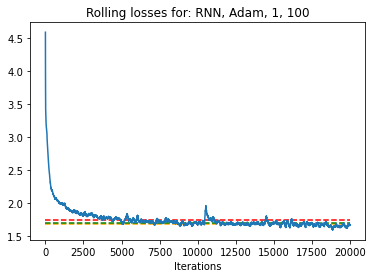

In [5]:
file = open('./Results/Complete Sherlock Holmes/RNN/Adam/1/100/all_losses.txt').read()
losses = [float(i) for i in file.split(' ')]
rolling_losses=[]
for i in range(len(losses)):
    temp=losses[np.max((i-100, 0)):i+1]
    rolling_losses.append(np.sum(temp)/len(temp))
avg = np.sum(losses)/len(losses)
avg_half = np.sum(losses[10000:])/len(losses[10000:])
avg_quart = np.sum(losses[5000:])/len(losses[5000:])
plt.plot(rolling_losses)
plt.hlines([avg,avg_half,avg_quart],0,len(losses)-1,['red','orange','green'],'dashed')
plt.title('Rolling losses for: RNN, Adam, 1, 100')
plt.xlabel('Iterations')

plt.savefig('Images/loss_graph.png')
plt.show()

*(Above) Example plot showing the rolling losses while training the model with cell type: RNN, optimizer: Adam, 1 hidden layer and layer size of 100.*

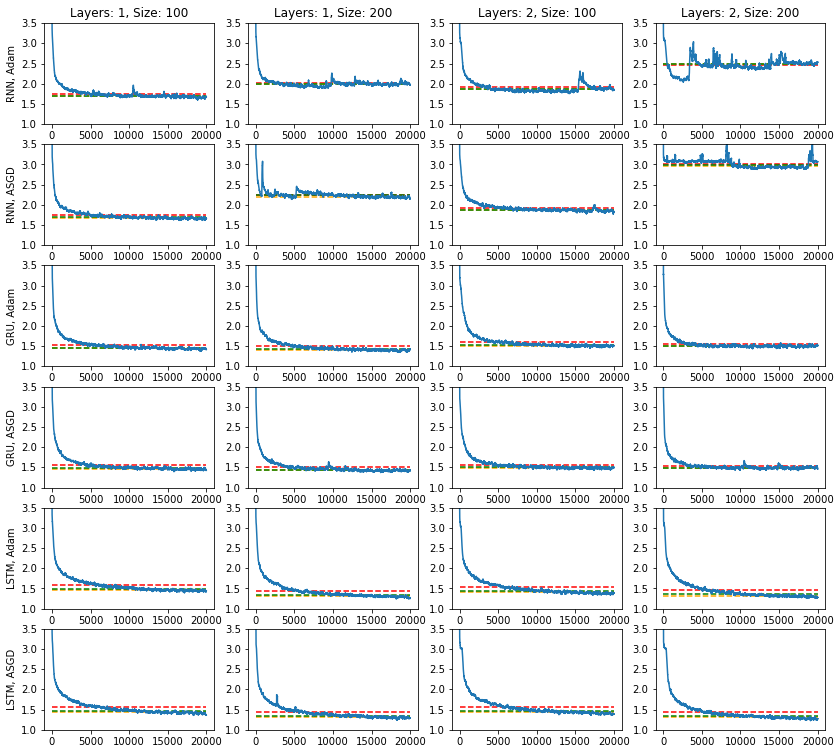

In [6]:
plt.figure(figsize=(14,13))
sub_count = 1
for cell_type in ['RNN','GRU','LSTM']:
    for optim in ['Adam','ASGD']:
        for numlayers in ['1','2']:
            for size in ['100','200']:
                file_name = './Results/Complete Sherlock Holmes/'
                file_name += '{}/{}/{}/{}/all_losses.txt'.format(cell_type, optim, numlayers, size)
                file = open(file_name).read()
                losses = [float(i) for i in file.split(' ')]
                rolling_losses=[]
                for i in range(len(losses)):
                    temp=losses[np.max((i-100, 0)):i+1]
                    rolling_losses.append(np.sum(temp)/len(temp))
                    
                avg = np.sum(losses)/len(losses)
                avg_half = np.sum(losses[10000:])/len(losses[10000:])
                avg_quart = np.sum(losses[5000:])/len(losses[5000:])
                
                plt.subplot(6,4,sub_count)
                plt.plot(rolling_losses)
                plt.hlines([avg,avg_half,avg_quart],0,len(losses)-1,['red','orange','green'],'dashed')
                plt.ylim(1.0,3.5)
                if sub_count <= 4:
                    plt.title('Layers: {}, Size: {}'.format(numlayers, size))
                if sub_count%4 == 1:
                    plt.ylabel('{}, {}'.format(cell_type, optim))
                
                sub_count+=1
plt.savefig('Images/all_loss_graphs.png')

*(Above) Rolling losses for all models*

## Table of performance results for each model

In [7]:
df = pd.read_csv('results.csv', sep=',')
df

,Cell Type,Optimizer,# Hidden Layers,Hidden Layer Size,Avg Loss,last half,last quarter,training time (min),Sample char count w/o spaces,Sample char count w/ spaces,Sample word count,spelling errors,grammer errors,% spelling errors
0,RNN,Adam,1,100,1.753240,1.690466,1.673080,29.160343,3744,4892,819,294,18,0.358974
1,RNN,Adam,1,200,2.011810,2.003207,1.994535,29.708095,3864,4892,723,385,17,0.532503
2,RNN,Adam,2,100,1.908531,1.872844,1.929789,43.287523,3769,4881,785,363,18,0.462420
3,RNN,Adam,2,200,2.457533,2.482899,2.530376,48.069504,4062,4912,699,497,25,0.711016
4,RNN,ASGD,1,100,1.745751,1.673216,1.662270,43.538487,3785,4916,826,297,21,0.359564
5,RNN,ASGD,1,200,2.252878,2.204309,2.192678,29.156702,3690,4867,861,437,25,0.507549
6,RNN,ASGD,2,100,1.932660,1.863559,1.854473,67.390463,3546,4848,798,337,25,0.422306
7,RNN,ASGD,2,200,3.019652,2.958157,2.986661,45.852272,3898,4960,852,559,53,0.656103
8,GRU,Adam,1,100,1.530559,1.448299,1.436921,27.283551,3713,4910,874,204,22,0.233410
9,GRU,Adam,1,200,1.494480,1.410895,1.401998,41.744309,3726,4918,882,196,20,0.222222


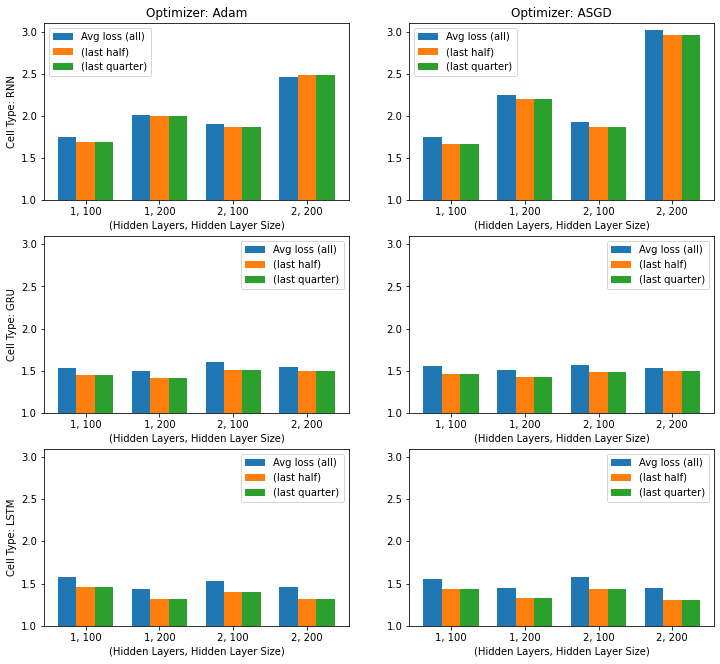

In [8]:
plt.figure(figsize=(12,15))
sub_count = 1
for cell_type in ['RNN','GRU','LSTM']:
    for optim in ['Adam','ASGD']:
        df_sub = df
        df_sub = df_sub[df_sub['Cell Type']==cell_type]
        df_sub = df_sub[df_sub['Optimizer']==optim]
        df_sub = df_sub[['Avg Loss','last half','last quarter']]
        losses = df_sub.to_numpy()
        plt.subplot(4,2,sub_count)
        avgs = losses[:,0]
        halfs = losses[:,1]
        quarts = losses[:,2]
        ind = np.arange(4) 
        width = 0.25
        plt.bar(ind, avgs, width, label='Avg loss (all)')
        plt.bar(ind + width, halfs, width, label='(last half)')
        plt.bar(ind + 2*width, halfs, width, label='(last quarter)')
        plt.ylim(1.0,3.1)
        if sub_count%2 == 1:
            plt.ylabel('Cell Type: {}'.format(cell_type))
        plt.xlabel('(Hidden Layers, Hidden Layer Size)')
        if sub_count <=2 :
            plt.title('Optimizer: {}'.format(optim))
        plt.xticks(ind + width, ('1, 100', '1, 200', '2, 100', '2, 200'))
        plt.legend(loc='best')
        sub_count+=1
plt.savefig('Images/loss_comparison.png')

*(Above) Bar chart comparison of average loss per all losses, last half losses, and last quarter losses.*

In [9]:
labels = []
for cell_type in ['RNN','GRU','LSTM']:
    for optim in ['Adam','ASGD']:
        for numlayers in ['1','2']:
            for size in ['100','200']:
                labels.append('{}, {}, {}, {}'.format(cell_type, optim, numlayers, size))

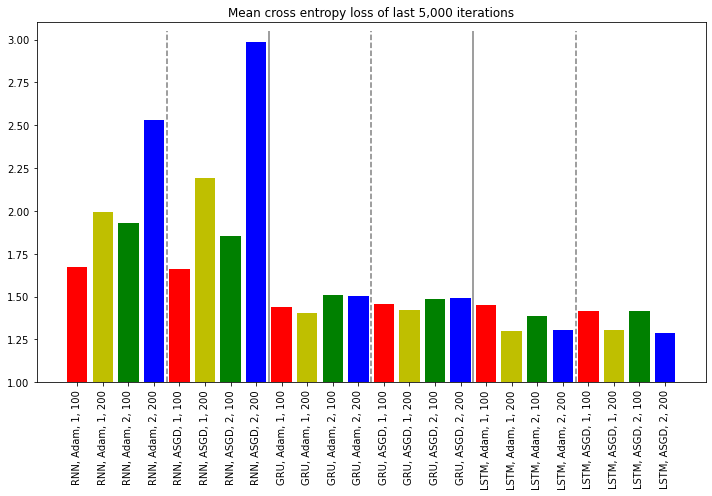

Lowest cross entropy loss: LSTM, ASGD, 2, 200. (1.286444902)


In [10]:
losses = df['last quarter'].to_numpy()
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(losses)),losses,color=['r','y','g','b'],tick_label=labels)
plt.xticks(rotation='vertical')
plt.ylim(1.0,3.1)
plt.vlines([7.5,15.5], 1.0, 3.05, 'gray')
plt.vlines([3.5,11.5,19.5], 1.0, 3.05, 'gray','dashed')
plt.title('Mean cross entropy loss of last 5,000 iterations')
plt.tight_layout()
plt.savefig('Images/loss_last_quarter.png')
plt.show()

print('Lowest cross entropy loss: LSTM, ASGD, 2, 200. ({})'.format(df['last quarter'].min()))

*(Above) Comparison of last quarter cross entropy loss across all models.*

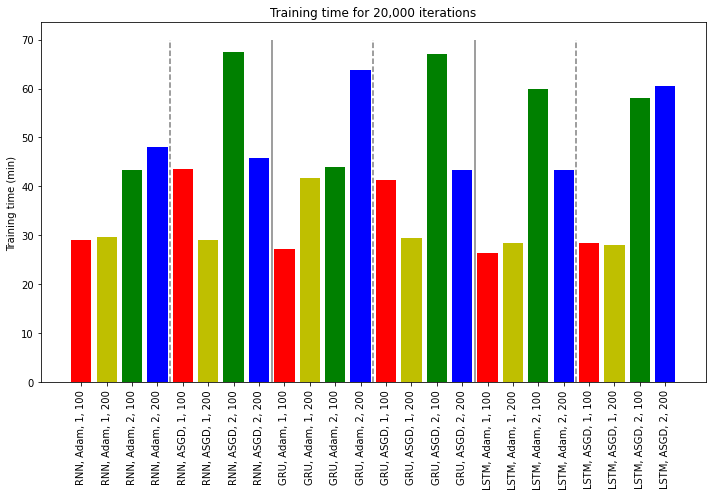

Shortest training time: LSTM, Adam, 1, 100. (26.35854196 min)


In [11]:
times = df['training time (min)'].to_numpy()
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(times)),times,color=['r','y','g','b'],tick_label=labels)
plt.xticks(rotation='vertical')
plt.vlines([7.5,15.5], 0, 70, 'gray')
plt.vlines([3.5,11.5,19.5], 0, 70, 'gray','dashed')
plt.ylabel('Training time (min)')
plt.title('Training time for 20,000 iterations')
plt.tight_layout()
plt.savefig('Images/training_time.png')
plt.show()

print('Shortest training time: LSTM, Adam, 1, 100. ({} min)'.format(df['training time (min)'].min()))

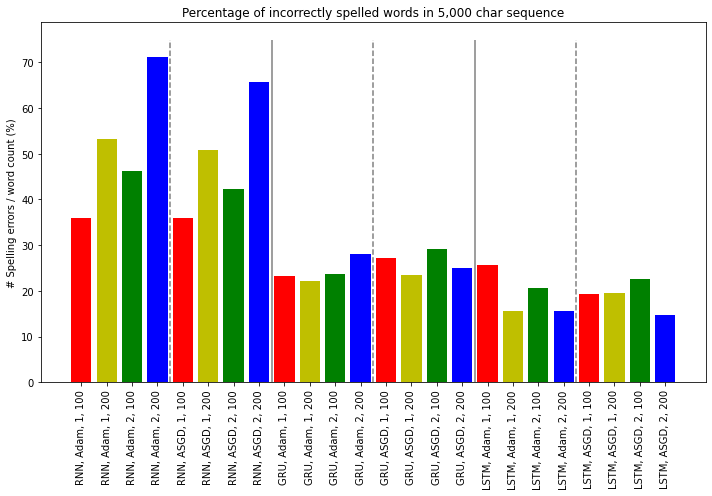

Smallest percentage of incorrectly spelled words: LSTM, ASGD, 2, 200. (14.7161066%) 


In [12]:
errors = df['% spelling errors'].to_numpy()*100
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(times)),errors,color=['r','y','g','b'],tick_label=labels)
plt.xticks(rotation='vertical')
plt.vlines([7.5,15.5], 0, 75, 'gray')
plt.vlines([3.5,11.5,19.5], 0, 75, 'gray','dashed')
plt.ylabel('# Spelling errors / word count (%)')
plt.title('Percentage of incorrectly spelled words in 5,000 char sequence')
plt.tight_layout()
plt.savefig('Images/spelling_percentage.png')
plt.show()

print('Smallest percentage of incorrectly spelled words: LSTM, ASGD, 2, 200. ({}%) '.format(100*df['% spelling errors'].min()))

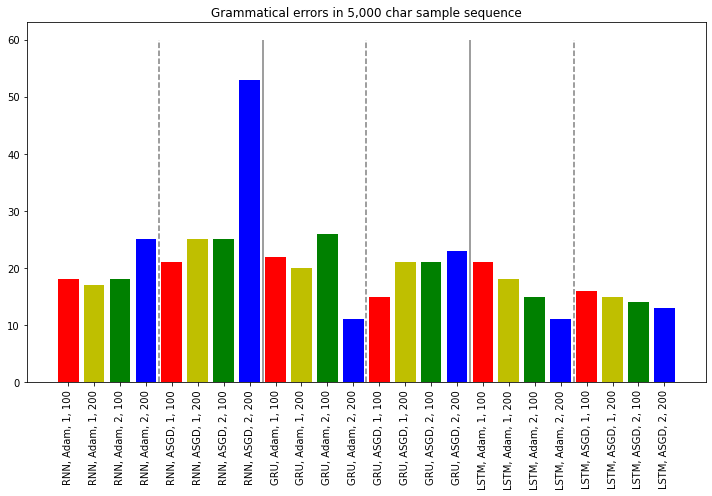

Fewest grammatical errors: GRU, Adam, 2, 200. (11)


In [13]:
gerrors = df['grammer errors'].to_numpy()
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(times)),gerrors,color=['r','y','g','b'],tick_label=labels)
plt.xticks(rotation='vertical')
plt.vlines([7.5,15.5], 0, 60, 'gray')
plt.vlines([3.5,11.5,19.5], 0, 60, 'gray','dashed')
plt.title('Grammatical errors in 5,000 char sample sequence')
plt.tight_layout()
plt.savefig('Images/grammar_errors.png')
plt.show()

print('Fewest grammatical errors: GRU, Adam, 2, 200. ({})'.format(df['grammer errors'].min()))

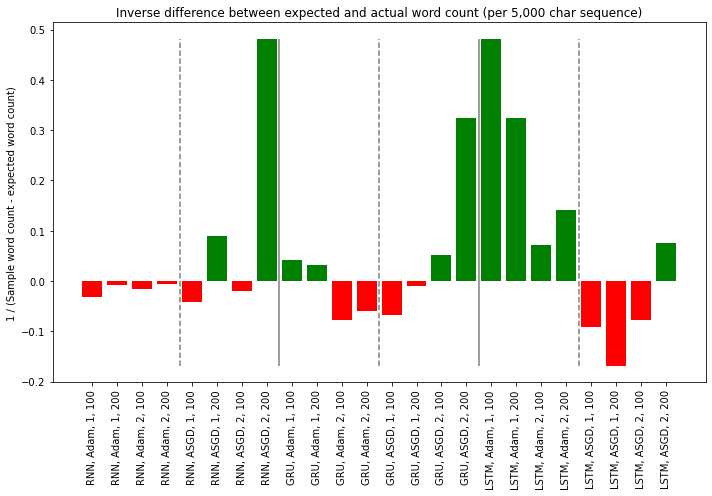

In [14]:
data = (df['Sample word count'].to_numpy() - n1)**-1
plt.figure(figsize=(10,7))
colors=['g' if i>=0 else 'r' for i in data]
plt.bar(np.arange(len(times)),data,color=colors,tick_label=labels)
plt.xticks(rotation='vertical')
plt.vlines([7.5,15.5], data.min(), data.max(), 'gray')
plt.vlines([3.5,11.5,19.5], data.min(), data.max(), 'gray','dashed')
plt.ylabel('1 / (Sample word count - expected word count)')
plt.title('Inverse difference between expected and actual word count (per 5,000 char sequence)')
plt.tight_layout()
plt.savefig('Images/word_count_comparison.png')
plt.show()

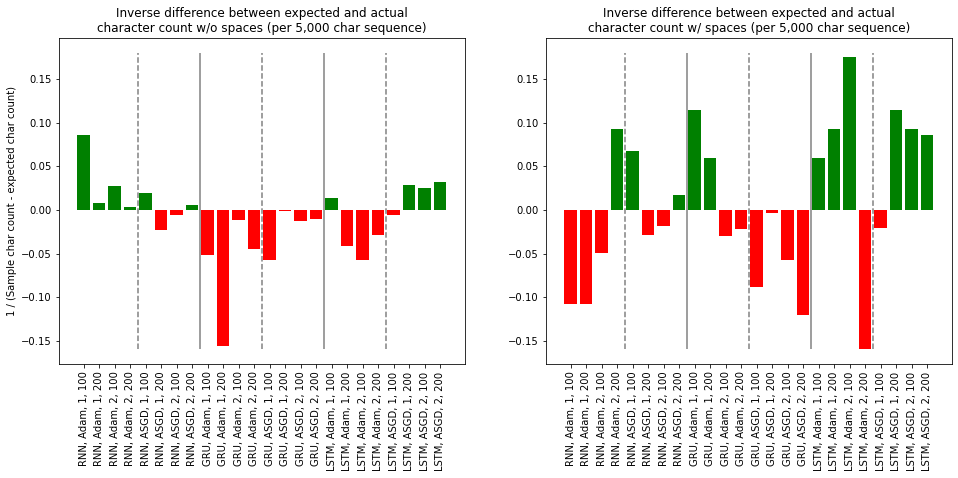

In [15]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
data = (df['Sample char count w/o spaces'].to_numpy() - n3)**-1

colors=['g' if i>=0 else 'r' for i in data]
plt.bar(np.arange(len(times)),data,color=colors,tick_label=labels)
plt.xticks(rotation='vertical')
plt.vlines([7.5,15.5], -0.16, 0.18, 'gray')
plt.vlines([3.5,11.5,19.5], -0.16, 0.18, 'gray','dashed')
plt.ylabel('1 / (Sample char count - expected char count)')
plt.title('Inverse difference between expected and actual\ncharacter count w/o spaces (per 5,000 char sequence)')

plt.subplot(1,2,2)
data = (df['Sample char count w/ spaces'].to_numpy() - n2)**-1

colors=['g' if i>=0 else 'r' for i in data]
plt.bar(np.arange(len(times)),data,color=colors,tick_label=labels)
plt.xticks(rotation='vertical')
plt.vlines([7.5,15.5], -0.16, 0.18, 'gray')
plt.vlines([3.5,11.5,19.5], -0.16, 0.18, 'gray','dashed')
plt.title('Inverse difference between expected and actual\ncharacter count w/ spaces (per 5,000 char sequence)')

plt.savefig('Images/char_count_comparison.png')
plt.show()